In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 10 23:42:20 2021

@author: pmarc

Résolution Problème L10 - #1 par Pierre-Marc Juneau, 14 avril 2021

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.api as stm
import statsmodels.stats.weightstats as ws
import math


In [2]:

donnee = pd.read_csv('../Fichiers/DonneesMarketingv0r2.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)


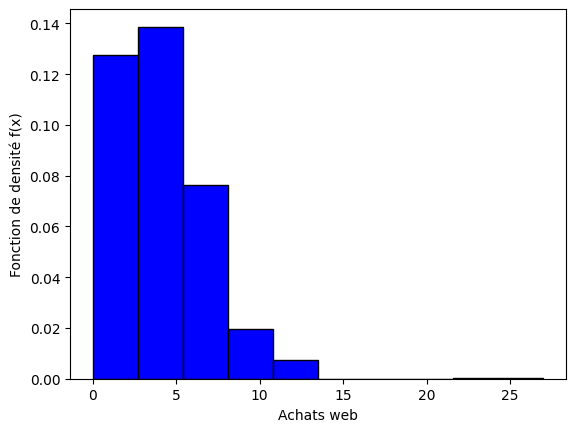

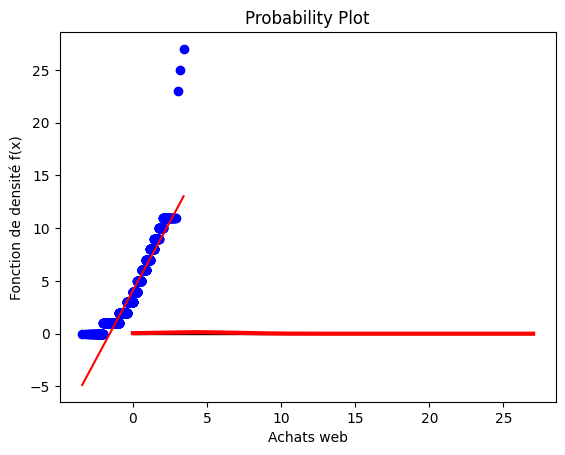

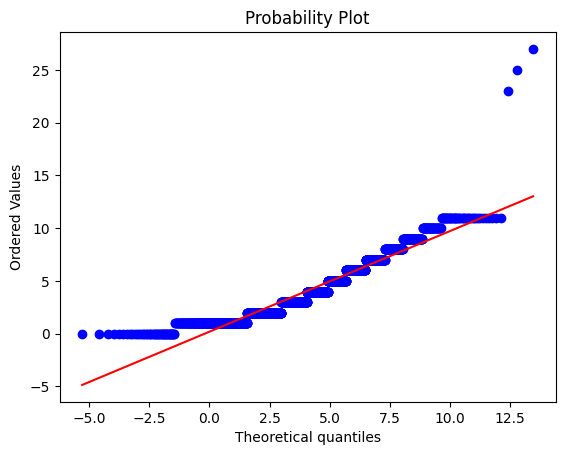

In [3]:

"Pré-traitement"

donnee=donnee.dropna()

Variable=donnee["Achats web"]
var_nom="Achats web"
ax=Variable.plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel(var_nom)
ax.set_ylabel("Fonction de densité f(x)")

"Vérifier si les données sont normales"
sts.probplot(Variable.values, dist=sts.norm, plot=plt.figure().add_subplot(111))

d=1000
grille_x = np.linspace(Variable.min(), Variable.max(), d)
dx=(Variable.max()-(Variable.min()))/(d-1)
mu, sigma = sts.norm.fit(Variable.values)
param=sts.norm.fit(Variable.values)
pdf = sts.norm.pdf(grille_x, mu, sigma)
ax=Variable.plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel(var_nom)
ax.plot(grille_x, pdf, linewidth=3, color = 'red')
ax.set_ylabel("Fonction de densité f(x)")


sts.probplot(Variable.values, dist=sts.norm(mu, sigma), plot=plt.figure().add_subplot(111))
Fit_normal = sts.kstest(Variable,'norm',param)



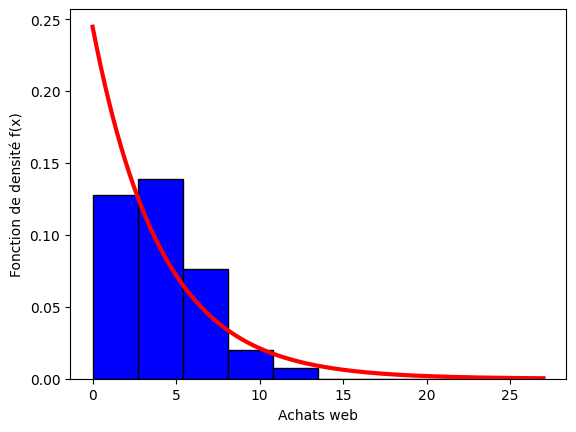

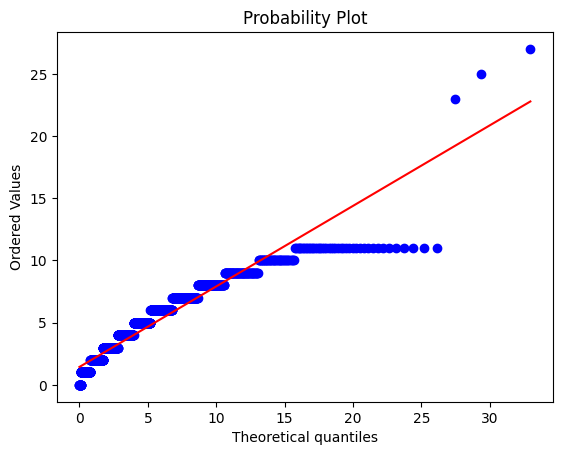

In [4]:

"Vérifier si les données suivent une loi exponentielle"

d=1000
grille_x = np.linspace(Variable.min(), Variable.max(), d)
dx=(Variable.max()-(Variable.min()))/(d-1)
loc,lambdaa=sts.expon.fit(Variable.values)
param=sts.expon.fit(Variable.values)
pdf = sts.expon.pdf(grille_x,loc,lambdaa)
ax=Variable.plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel(var_nom)
ax.plot(grille_x, pdf, linewidth=3, color = 'red')
ax.set_ylabel("Fonction de densité f(x)")


sts.probplot(Variable.values, dist=sts.expon(loc,lambdaa),plot=plt.figure().add_subplot(111))
Fit_expon = sts.kstest(Variable.values,'expon',param)


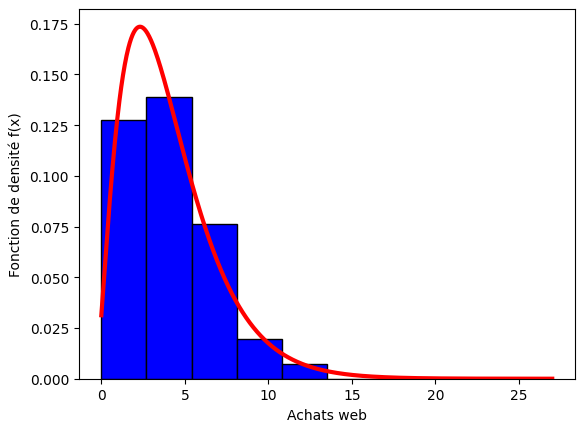

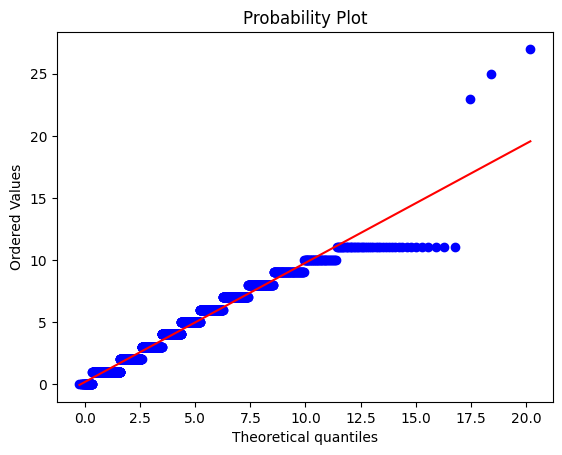

In [5]:


"Vérifier si les données suivent une loi gamma"

d=1000
grille_x = np.linspace(Variable.min(), Variable.max(), d)
dx=(Variable.max()-(Variable.min()))/(d-1)
k,loc,theta=sts.gamma.fit(Variable.values)
param=sts.gamma.fit(Variable.values)
pdf = sts.gamma.pdf(grille_x,k,loc,scale=theta)
ax=Variable.plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel(var_nom)
ax.plot(grille_x, pdf, linewidth=3, color = 'red')
ax.set_ylabel("Fonction de densité f(x)")
#ax.set_ylim([0,1])


sts.probplot(Variable.values, dist=sts.gamma(k,loc,theta), plot=plt.figure().add_subplot(111))
Fit_gamma = sts.kstest(Variable.values,'gamma',param)








